## Setup


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


filepath = r'C:\Users\simk8\OneDrive\Desktop\R Working Repository\College Basketball Dataset\cbb.csv'
cbb = pd.read_csv(filepath)

cbb.fillna({'POSTSEASON':'Did Not Qualify'}, inplace = True)
cbb.fillna({'SEED': 18}, inplace = True)

## Exploratory Analysis

In [13]:
cbb_display = cbb.sort_values(by = ['TEAM', 'YEAR'], ascending = [True, True])
cbb_display.head(100)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1473,Abilene Christian,Slnd,21,2,95.1,116.4,0.0889,47.2,56.4,22.3,18.0,24.9,33.8,42.3,48.3,42.3,56.8,37.3,37.1,64.9,-14.1,Did Not Qualify,18.0,2014
1252,Abilene Christian,Slnd,28,7,90.6,111.3,0.0854,47.3,55.3,19.8,20.8,24.1,33.9,28.3,44.7,42.0,55.2,37.8,37.0,64.0,-16.8,Did Not Qualify,18.0,2015
1264,Abilene Christian,Slnd,27,9,96.3,111.8,0.1529,50.5,54.6,19.2,19.2,24.5,27.6,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,Did Not Qualify,18.0,2016
1276,Abilene Christian,Slnd,25,13,97.5,107.5,0.2450,52.5,52.8,21.0,21.4,23.0,31.7,34.7,44.3,50.7,52.1,37.1,36.1,67.1,-12.5,Did Not Qualify,18.0,2017
1288,Abilene Christian,Slnd,28,16,96.5,106.6,0.2423,50.4,51.4,20.3,21.6,27.3,29.7,31.5,43.2,51.9,52.3,31.8,33.2,69.8,-11.3,Did Not Qualify,18.0,2018
2292,Abilene Christian,Slnd,30,27,100.9,100.7,0.5064,51.9,49.8,17.3,23.3,27.0,28.5,34.0,38.3,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019
1810,Air Force,MWC,30,16,109.2,103.5,0.6481,54.7,51.9,18.5,19.1,23.7,31.8,30.8,36.6,52.9,54.2,38.1,32.4,64.4,-2.9,Did Not Qualify,18.0,2013
1474,Air Force,MWC,28,10,98.9,104.9,0.3360,49.5,50.9,20.5,17.8,26.4,30.2,37.1,43.9,49.6,51.1,32.9,33.7,65.5,-10.7,Did Not Qualify,18.0,2014
883,Air Force,MWC,29,12,105.0,110.2,0.3660,53.6,53.0,19.2,20.2,29.6,32.6,30.8,35.5,53.9,51.5,35.4,36.6,61.6,-10.2,Did Not Qualify,18.0,2015
891,Air Force,MWC,30,12,98.1,105.4,0.3060,48.0,51.8,18.8,19.4,24.3,28.1,39.6,37.2,47.0,51.3,33.4,34.9,67.9,-10.9,Did Not Qualify,18.0,2016


NOT ALL DATA DISPLAYED! Delete ".head(100)" to see full dataset!

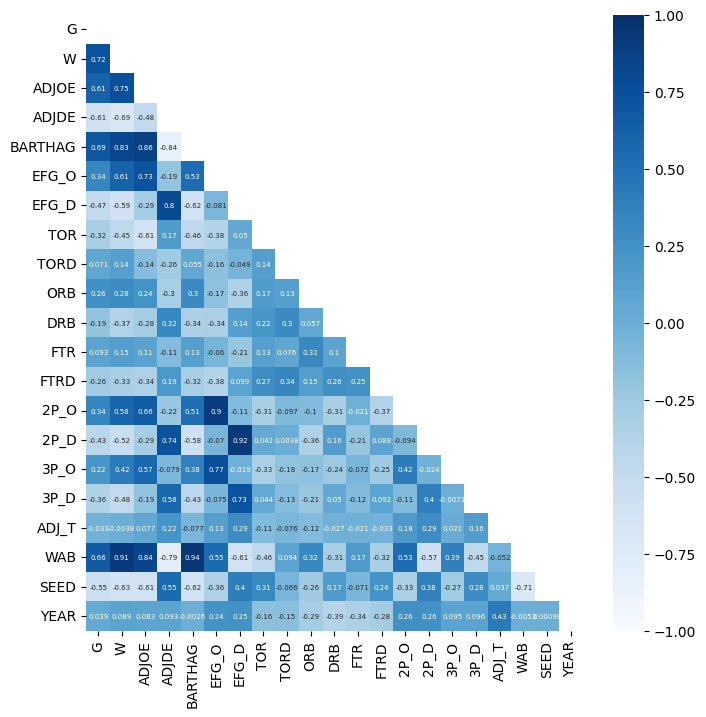

In [3]:
fig = plt.figure(figsize = (8,8))
corr = cbb.corr(numeric_only = True)
sb.heatmap(corr, cmap="Blues", vmin = -1, vmax = 1, annot = True, annot_kws={'size': 5}, mask = np.triu(corr));

## PCA

In [4]:
full_list = cbb.columns
remove_list = ['TEAM','CONF','POSTSEASON', 'YEAR']

pca_list = [i for i in full_list if i not in remove_list]

x = cbb.loc[:, pca_list].values
y = cbb.loc[:, ['POSTSEASON']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 3)
PCs = pca.fit_transform(x)
PC_df = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2', 'PC3'])
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [5]:
target_df = cbb['POSTSEASON']
new_df = pd.concat([PC_df, target_df], axis = 1)

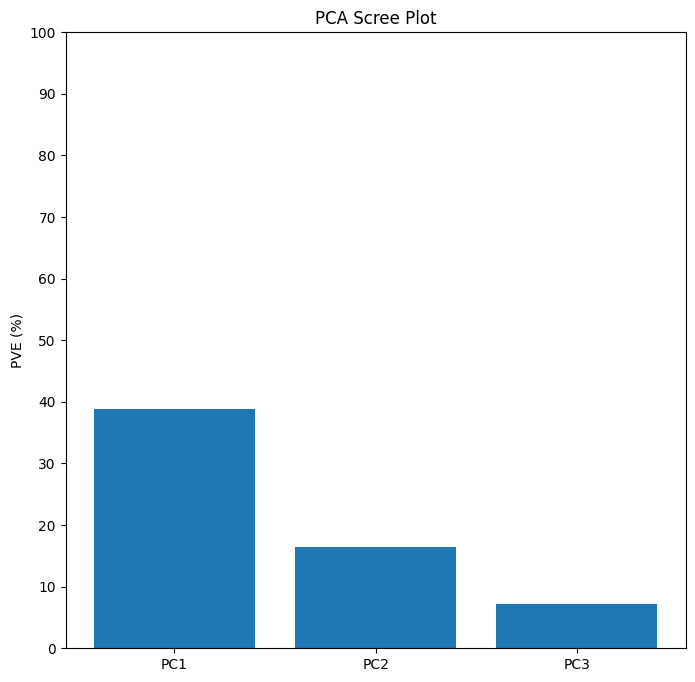

In [6]:
fig = plt.figure(figsize = (8,8))
PVE = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
columns = ['PC1', 'PC2', 'PC3']
plt.bar(x = range(1,4), height = PVE, tick_label=columns)
plt.yticks(np.arange(0, 110, 10, dtype=int))
plt.ylabel('PVE (%)')
plt.title('PCA Scree Plot')
plt.show()

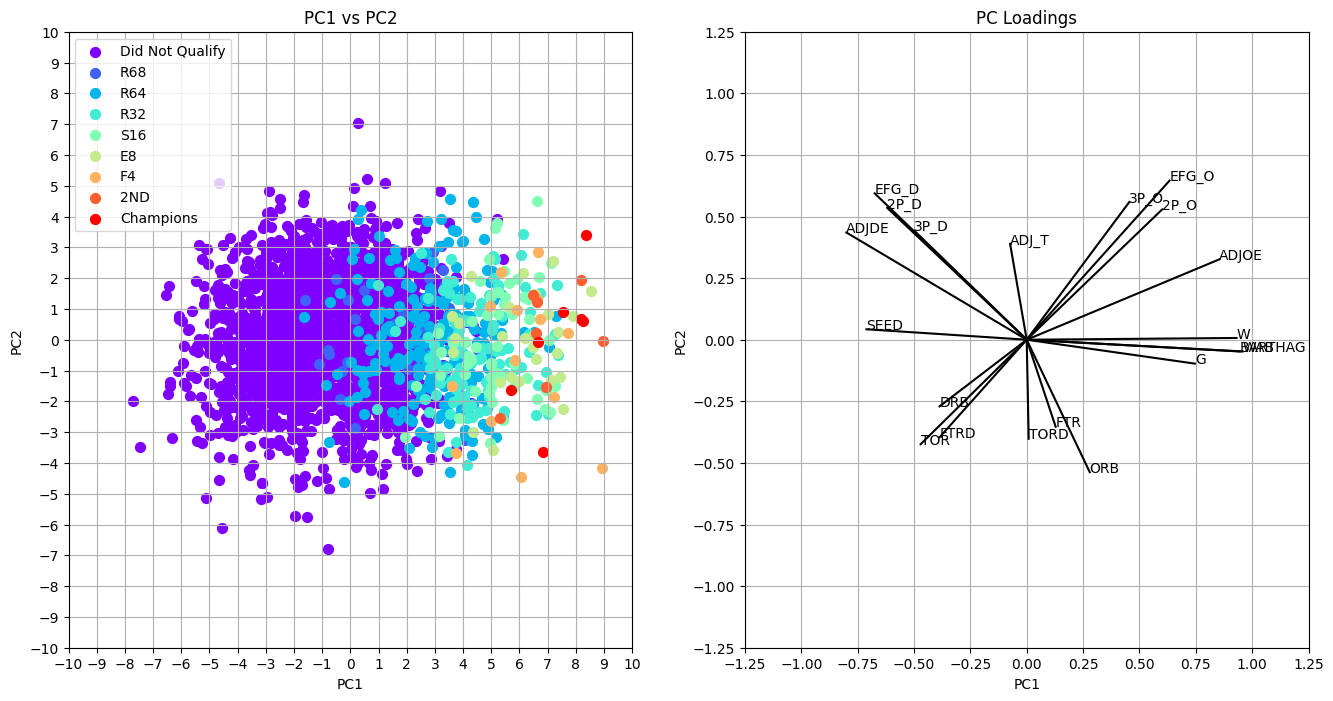

In [7]:
fix , axes = plt.subplots(1,2,figsize=(16,8)) 

targets = ['Did Not Qualify','R68','R64','R32','S16','E8','F4','2ND','Champions']
colors = iter(cm.rainbow(np.linspace(0, 1, len(np.unique(new_df['POSTSEASON'])))))

for target in targets:
    IndicesToKeep = new_df['POSTSEASON'] == target
    axes[0].scatter(new_df.loc[IndicesToKeep,'PC1'],new_df.loc[IndicesToKeep,'PC2'],color=next(colors),label=target,s = 50)
    
axes[0].set_title('PC1 vs PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_xticks(np.arange(-10,11,1))
axes[0].set_yticks(np.arange(-10,11,1));
axes[0].legend(targets, loc ="upper left")
axes[0].grid()


for index, variable_name in enumerate(pca_list):
    axes[1].plot([0, loadings[index, 0]], [0, loadings[index, 1]], color = "black" )
    plt.text(loadings[index, 0], loadings[index, 1], variable_name)

axes[1].set_title('PC Loadings')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_xticks(np.arange(-1.25,1.5,0.25))
axes[1].set_yticks(np.arange(-1.25,1.5,0.25))
axes[1].grid();

## K-Means Clustering

In [8]:
full_list = cbb.columns
remove_list = ['TEAM','CONF','YEAR','POSTSEASON']

kmeans_list = [i for i in full_list if i not in remove_list]

x = cbb.loc[:, kmeans_list].values
x = pd.DataFrame(x)
y = cbb.loc[:, ['POSTSEASON']].values
y = pd.DataFrame(y)

inertia_values = []
k = range(1,11)
for i in k:
    model = KMeans(n_clusters = i, n_init = 10)
    model.fit(x)
    inertia_values.append(model.inertia_)

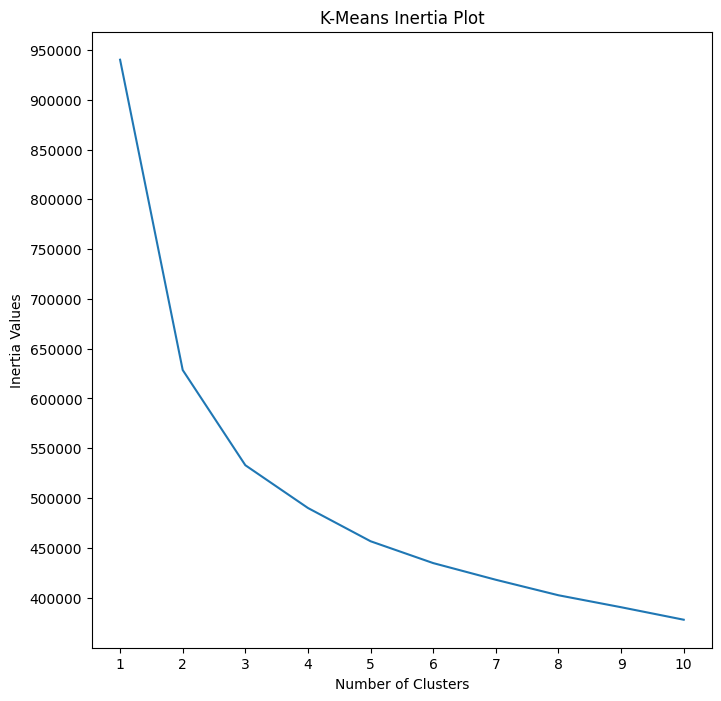

In [9]:
fig = plt.figure(figsize = (8,8))
plt.plot(k,inertia_values)
plt.title("K-Means Inertia Plot")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1, 11, 1, dtype=int))
plt.yticks(np.arange(400000, 1000000, 50000, dtype=int))
plt.ylabel("Inertia Values")
plt.show();

In [10]:
model = KMeans(n_clusters = 3, n_init = 10)
model.fit(x)
predicted_values = model.predict(x)
x['Predicted'] = predicted_values
x['Actual'] = y

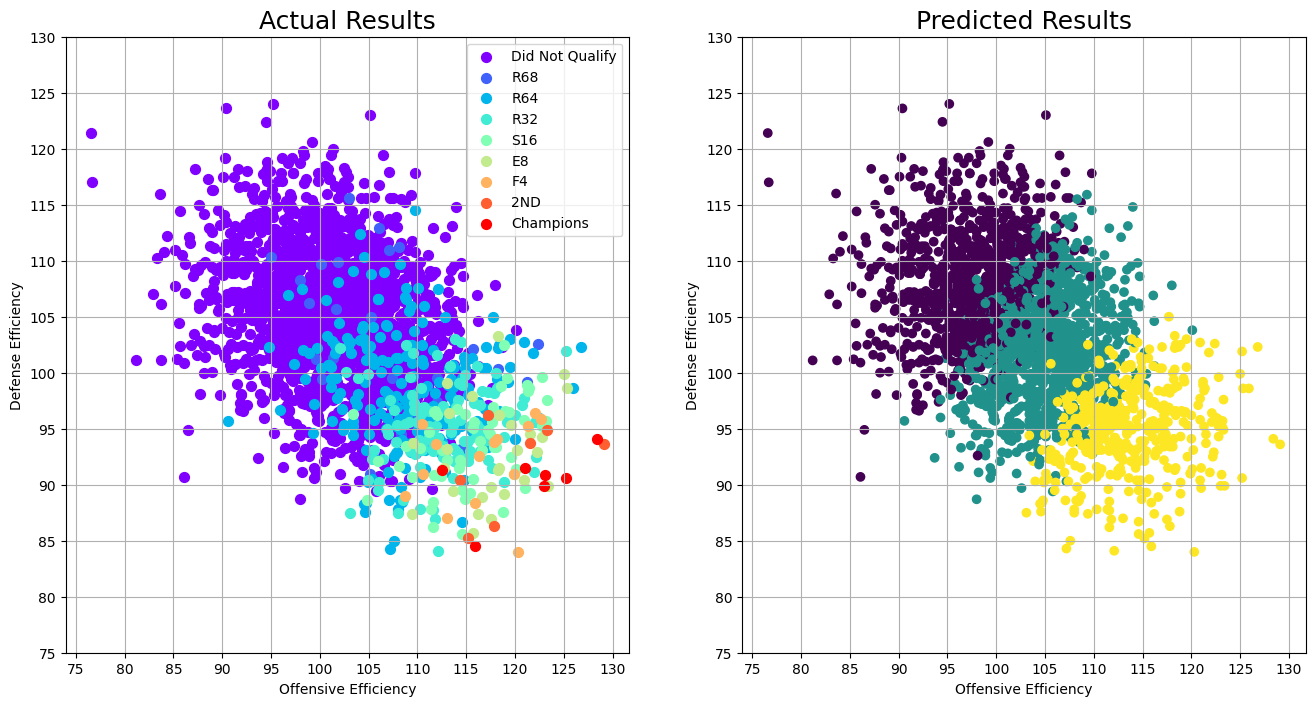

In [11]:
fix , axes = plt.subplots(1, 2, figsize=(16,8))

targets = ['Did Not Qualify','R68','R64','R32','S16','E8','F4','2ND','Champions']
colors = iter(cm.rainbow(np.linspace(0, 1, len(np.unique(x['Actual'])))))

for target in targets:
    IndicesToKeep = x['Actual'] == target
    TargetData = x.loc[IndicesToKeep]
    axes[0].scatter(TargetData[2],TargetData[3],color=next(colors),label=target,s = 50)
    
axes[0].set_title('Actual Results', fontsize =18)
axes[0].set_xlabel("Offensive Efficiency")
axes[0].set_ylabel("Defense Efficiency")
axes[0].legend(targets, loc = "upper right")
axes[0].set_xticks(np.arange(75,135,5))
axes[0].set_yticks(np.arange(75,135,5))
axes[0].grid();


axes[1].scatter(x[2], x[3], c = x['Predicted'], label = x['Predicted'])   
axes[1].set_title('Predicted Results', fontsize =18)
axes[1].set_xlabel("Offensive Efficiency")
axes[1].set_ylabel("Defense Efficiency")
axes[1].set_xticks(np.arange(75,135,5))
axes[1].set_yticks(np.arange(75,135,5))
axes[1].grid();

## Indicator Transformation

In [12]:
def pca_prep(dataframe, fix_list):
    for column_name in fix_list:
        index = dataframe.columns.get_loc(column_name)
        column_data = dataframe.iloc[:, index]
        number_unique = column_data.nunique()
        unique_array = np.unique(dataframe[column_name])
        for item in unique_array:
            indicator_list = list(map(lambda x: 1 if x == item else 0, dataframe[column_name]))
            dataframe.insert(index, item, indicator_list, True)
    return dataframe

In [13]:
cbb_2 = pca_prep(cbb, ['CONF', 'YEAR'])
del cbb_2['TEAM']
del cbb_2['CONF']
del cbb_2['YEAR']

## Muliclass Logistic Regression

In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
category_list = list(map(lambda x: 1 if x == 'Champion' else 2 if x == '2ND' else 3 if x == 'F4' else 4 if x == 'E8'\
                        else 5 if x == 'S16' else 6 if x == 'R32' else 7 if x == 'R64' else 8 if x == 'R68'\
                        else 9, cbb_2['POSTSEASON']))
cbb_2['POSTSEASON'] = category_list
x = cbb_2.loc[:, cbb_2.columns != 'POSTSEASON']
y = cbb_2['POSTSEASON']

In [16]:
x.columns = x.columns.astype(str)
scaled_data = pd.DataFrame(StandardScaler().fit_transform(x.iloc[:, 35:55]), columns=x.iloc[:, 35:55].columns)
x = pd.concat([x.iloc[:, 0:35], scaled_data, x.iloc[:, 55:62]], axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)
K_Fold_CV = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=K_Fold_CV, n_jobs=-1)
print('Training Prediction Accuracy: %.3f & Standard Deviation: %.3f' % (mean(scores), std(scores)))
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
accuracy_score = accuracy_score(y_test, y_hat)
print('Test Prediction Accuracy: %.3f' % accuracy_score)

Training Prediction Accuracy: 0.886 & Standard Deviation: 0.006
Test Prediction Accuracy: 0.886


In [18]:
errors = []
corrects = []
y_errors = []
y_corrects = []
y_hats = []

for index, prediction in enumerate(y_hat):
    if prediction != y_test.iloc[index]:
        errors.append(x_test.iloc[index, :])
        y_errors.append(y_test.iloc[index])
        y_hats.append(prediction)
    else:
        corrects.append(x_test.iloc[index, :])
        y_corrects.append(y_test.iloc[index])

errors = pd.DataFrame(errors, columns = x_test.columns)
errors['Predicted'] = y_hats
errors['Actual'] = y_errors

corrects = pd.DataFrame(corrects, columns = x_test.columns)
corrects['POSTSEASON'] = y_corrects

In [19]:
actual_category = list(map(lambda x: 'Champion' if x == 1 else '2ND' if x == 2 else 'F4' if x == 3 else 'E8' if x == 4\
                        else 'S16' if x == 5 else 'R32' if x == 6 else 'R64' if x == 7 else 'R68' if x == 8\
                        else 'Did Not Qualify', errors['Actual']))
predicted_category = list(map(lambda x: 'Champion' if x == 1 else '2ND' if x == 2 else 'F4' if x == 3 else 'E8' if x == 4\
                        else 'S16' if x == 5 else 'R32' if x == 6 else 'R64' if x == 7 else 'R68' if x == 8\
                        else 'Did Not Qualify', errors['Predicted']))
errors['Actual'] = actual_category
errors['Predicted'] = predicted_category

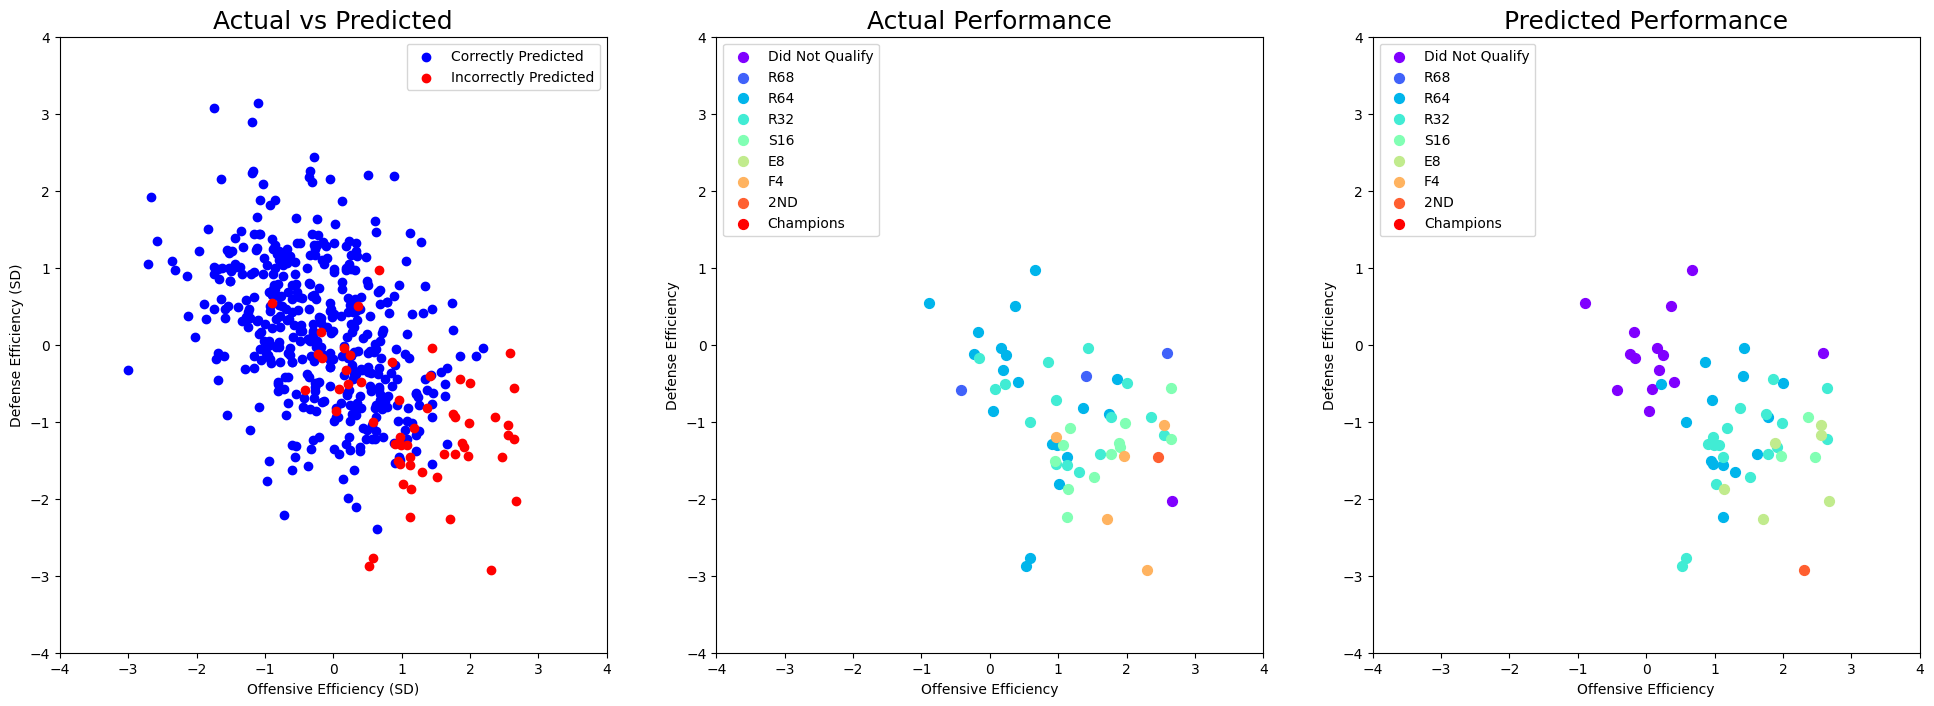

In [20]:
fix , axes = plt.subplots(1, 3, figsize=(24,8))

axes[0].scatter(corrects.iloc[:, 37], corrects.iloc[:, 38], c = "blue")
axes[0].scatter(errors.iloc[:, 37], errors.iloc[:, 38], c = "red")
axes[0].set_title('Actual vs Predicted', fontsize =18)
axes[0].set_xlabel("Offensive Efficiency (SD)")
axes[0].set_ylabel("Defense Efficiency (SD)")
axes[0].legend(['Correctly Predicted', 'Incorrectly Predicted'], loc="upper right")
axes[0].set_xticks(np.arange(-4,5,1))
axes[0].set_yticks(np.arange(-4,5,1));

targets = ['Did Not Qualify','R68','R64','R32','S16','E8','F4','2ND','Champions']
colors = iter(cm.rainbow(np.linspace(0, 1, 9)))

for target in targets:
    IndicesToKeep = errors['Actual'] == target
    TargetData = errors.loc[IndicesToKeep]
    axes[1].scatter(TargetData['ADJOE'],TargetData['ADJDE'],color=next(colors),label=target,s = 50)
    
axes[1].legend(targets, loc = 'upper left')
axes[1].set_title('Actual Performance', fontsize =18)
axes[1].set_xlabel("Offensive Efficiency")
axes[1].set_ylabel("Defense Efficiency")
axes[1].set_xticks(np.arange(-4,5,1))
axes[1].set_yticks(np.arange(-4,5,1));

targets = ['Did Not Qualify','R68','R64','R32','S16','E8','F4','2ND','Champions']
colors = iter(cm.rainbow(np.linspace(0, 1, 9)))

for target in targets:
    IndicesToKeep = errors['Predicted'] == target
    TargetData = errors.loc[IndicesToKeep]
    axes[2].scatter(TargetData['ADJOE'],TargetData['ADJDE'],color=next(colors),label=target,s = 50)
    
axes[2].legend(targets, loc = 'upper left')
axes[2].set_title('Predicted Performance', fontsize =18)
axes[2].set_xlabel("Offensive Efficiency")
axes[2].set_ylabel("Defense Efficiency")
axes[2].set_xticks(np.arange(-4,5,1))
axes[2].set_yticks(np.arange(-4,5,1));

## Random Forest

In [21]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth = 10)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("Test Prediction Accuracy:",metrics.accuracy_score(y_test, y_hat))

Test Prediction Accuracy: 0.9185336048879837


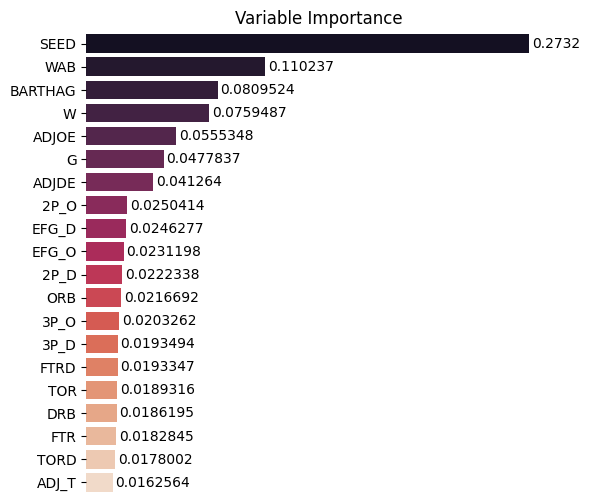

In [23]:
fig = plt.figure(figsize = (6,6))

variables = pd.DataFrame({'features': model.feature_names_in_, 'importances': model.feature_importances_ })
important_variables = variables.iloc[35:55, :].sort_values(by='importances', ascending=False)

g = sb.barplot(data=important_variables, x='importances', y ='features', palette="rocket")
sb.despine(bottom = True, left = True)
g.set_title('Variable Importance')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

#### Hard To Interpret

In [24]:
# fig, axes = plt.subplots(figsize=(10,10))
# fn = list(variables.iloc[:,0])
# cn = ['0','1','2','3','4','5','6','7','8','9']
# tree.plot_tree(model.estimators_[0], feature_names = fn, class_names = cn, filled = True);